In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ax_B = np.arange(0.1,2.1,0.1).tolist() # values of B field in T
ax_Pt = np.arange(20,300).tolist()

To calculate the accaptance of the TOF depending on the position:
$p_{T} = 3 \times B \times \rho$
Here the $p_{T}$ refers to the particles transverse momentum in MeV, the magnetic field $B$ is given in T and the bending radius $\rho$ in cm.
To calculate the acceptance of a TOF layer we need to remember that $R = 2\times rho$, with R as the radial position of the TOF layer.
We now can give the position of TOF layers as a function of the magnetic field for a minimum acceptance in $p_{T}$ as: $R = \frac{2 p_{T}}{3 B}$

In [3]:
2*75/(3*0.2)

249.99999999999997

In [4]:
ax_R_pt20 = []
ax_R_pt40 = []
ax_R_pt60 = []
ax_R_pt80 = []
ax_R_20 = []
ax_R_30 = []
ax_R_45 = []
ax_R_60 = []
for x in ax_B:
#     print(x)
    ax_R_pt20.append(2*15/(3*x))
    ax_R_pt40.append(2*40/(3*x))
    ax_R_pt60.append(2*60/(3*x))
    ax_R_pt80.append(2*80/(3*x))
    ax_R_20.append(20)
    ax_R_30.append(30)
    ax_R_45.append(45)
    ax_R_60.append(60)
# print(ax_R_pt75)

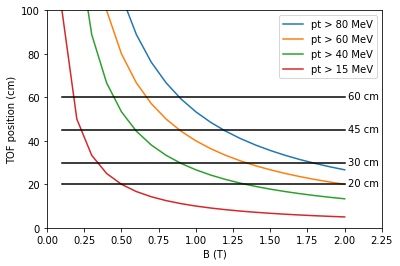

In [5]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.axis([0,2.25,0,100])
plt.plot(ax_B,ax_R_pt80,label = "pt > 80 MeV")
plt.plot(ax_B,ax_R_pt60,label = "pt > 60 MeV")
plt.plot(ax_B,ax_R_pt40,label = "pt > 40 MeV")
plt.plot(ax_B,ax_R_pt20,label = "pt > 15 MeV")
plt.plot(ax_B,ax_R_20,color="black")
plt.plot(ax_B,ax_R_45,color="black")
plt.plot(ax_B,ax_R_30,color="black")
plt.plot(ax_B,ax_R_60,color="black")
plt.xlabel("B (T)")
plt.ylabel("TOF position (cm)")
plt.legend()
ax.text(2.02,19,"20 cm")
ax.text(2.02,29,"30 cm")
ax.text(2.02,44,"45 cm")
ax.text(2.02,59,"60 cm")

plt.show()
fig.savefig('layerPos.pdf')

With a TOF layer at 44 cm and the same coverage of the tracking layer at 45 cm we end up with a surface of $2\pi r \times z = 2\pi 0.44m \times 2.64m = 7.3 m^{2}$. This significantly reduces the area to instrument from $31.5m^{2}$ to 23.2% of the original value. Assuming a scaling of the TOF only with the instrumented area, we then reduce the cost from 14.8 MChf to 3.5 MChf. However, the number of channels etc should be reviesed, as should the granualrity.

With a B field of 1 T we would be able to measure electrons down to 55-60 MeV/c. This would yield a $\sigma_{p_{T}}$ of about 2% at mid rapidity.

If we manage to have a continous PID for all particles this approach has different advantages.
The cost could be reduced drastically. Also the TOF mismatch should not be as much of a problem as with the TOF at 19 cm.

The problem I see right now is the continious PID at higher $p_{T}$.
A next stop could be to estimate the momentum range that we can cover with a given timing resolution $\sigma_{t}$. with this we then know where to put the RICH, so we have an overlap with the TOF. Since the detector is smaller: is it possible to have a better timing resolution?

The reach to lower momenta can still be achieved when running with smaller fields. Since I think this is probably a very special physics case, we need to study those and see if the statiscics for eg a conductivity measurement could be sufficient already with a fraction of the expected integrated luminosity.

In [6]:
print(np.pi * 2 * 0.44 * 2.64)
7.3/31.5 * 14.8

7.2985480528198075


3.42984126984127

Functions from Jochen

In [16]:
masses = [511e-6, 0.140, 0.493, 0.935] #e pi K p
bfield = 1.

# Calculate the cherenkov angle based on mass (m), momentum (p) and diffrective index (n)
def changle(m, p, n = 1.03):
    beta = p / sqrt(m^2 + p^2)
    return acos(1. / (n * beta))

# approximation
def sep_max(m1, m2, n = 1.03, nsigma = 3., res = 1.5e-3):
    return math.sqrt((m2**2 - m1**2)/(2. * nsigma * res * math.sqrt(n**2 - 1)))

def tof_sep_max(m1, m2, L = .85, nsigma = 3., res = 6.e-3):  # res = 3e8 * 20e-12 (c * sigma_t) = 6.e-3 
    return math.sqrt((m2**2 - m1**2) * L / (2. * nsigma * res))

def sep_min(m1, m2, n = 1.03):
    return max(m1, m2) / math.sqrt(n**2 - 1)

# beta = p / E = p / sqrt(p**2 + m**2)

def min_pt(b, r):
    return 0.3 * b * r/2.

def pt(p, eta):
    return p / math.cosh(eta)

In [17]:
# define functions to draw TOF and RICH
def draw_rich(ax, etas, R, n = 1.03, nsigma = 3., color = 'blue'):
    for i in range(0, len(ax)):
        lbound = [min_pt(bfield, R if eta <= 1.75 else 0.05) for eta in etas]
        thr = [pt(sep_min(masses[i], masses[i+1], n), eta) for eta in etas]
        lbound = np.maximum(thr, lbound)
        ubound = [pt(sep_max(masses[i], masses[i+1], n, nsigma), eta) for eta in etas]
        ax[i].fill_between(etas, lbound, np.maximum(lbound, ubound), 
                           alpha=1.0, ec=color, hatch='..', color=color, fc='none', label=f'RICH n={n} @ '+ str(R) + ' m')

def draw_tof(ax, etas, R,timeRes = 6.e-3, nsigmas = 3., color = 'orange', h = '\\\\'):
    for i in range(0, len(ax)):
        lbound = [min_pt(bfield, R if eta <= 1.75 else 1000.) for eta in etas]
        ubound = [pt(tof_sep_max(masses[i], masses[i+1], L=R * math.cosh(eta), nsigma = nsigmas, res = timeRes), eta) for eta in etas]
        ax[i].fill_between(etas, lbound, np.maximum(lbound, ubound), 
                           alpha=1., ec=color, hatch=h, color=color, fc='none', label=f'TOF @ '+ str(R) + ' m')

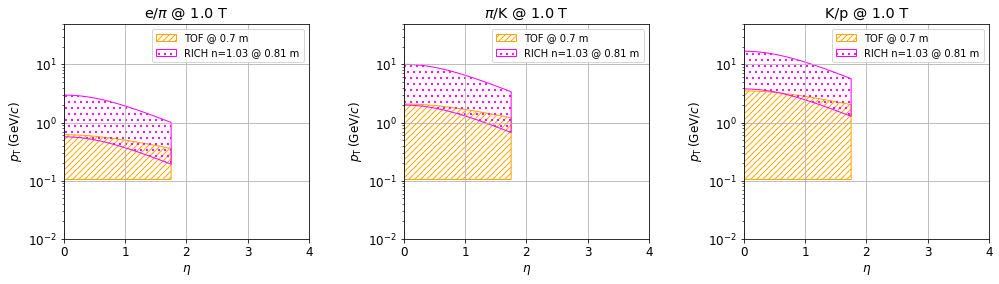

In [19]:
nplots = 3
fig, ax = plt.subplots(1, 3, figsize=(5*nplots, 5))
plt.rcParams.update({'font.size':12})
fig.tight_layout(pad=5.0)

etas = np.linspace(0., 4., 100)
betas = np.linspace(0., 1.75, 100)
fetas = np.linspace(1.75, 4., 100)


TofPos = 0.7
TofRes = 
draw_tof(ax, betas, TofPos , 6.e-3, 3.0, 'orange','////')
draw_rich(ax, betas, .81, n = 1.03, nsigma = 3., color='magenta')

# draw_tof(ax, fetas, .19, 3., 'green')

#draw_rich(ax, etas, n = 1.0005, color='magenta')
#draw_rich(ax, etas, n = 1.0014, color='red')
#draw_rich(ax, etas, n = 1.003, nsigma = 3., color='cyan')

# draw_rich(ax, fetas, n = 1.006, nsigma = 3., color='blue')


for a in ax:
    a.grid()
    a.set_yscale('log')
    a.set_xlabel(r"$\eta$")
    a.set_ylabel(r"$p_\mathrm{T}\,(\mathrm{GeV}/c)$")
    a.set_ylim(0.01, 50.)
    a.set_xlim(0., 4.)
    a.legend(fontsize=10)
ax[0].set_title(r"e/$\pi$ @ " + str(bfield) + " T")
ax[1].set_title(r"$\pi$/K @ " + str(bfield) + " T")
ax[2].set_title(r"K/p @ " + str(bfield) + " T")

plt.savefig('pid.pdf')